# Logistic Regression using scikit-learn

In [1]:
from sklearn.datasets import load_iris


iris = load_iris()

In [2]:
from sklearn.model_selection import train_test_split

x = iris.data[:, :2]
y = iris.target
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)

In [3]:
from sklearn.linear_model import LogisticRegression


logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


LogisticRegression()

In [4]:
from sklearn import metrics

y_pred = logisticRegr.predict(x_test)

score_metrics = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print(score_metrics)

score = logisticRegr.score(x_test, y_test)
print(score)


0.8333333333333334
0.8333333333333334


### Confusion matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. In this section, I am just showing two python packages (Seaborn and Matplotlib) for making confusion matrices more understandable and visually appealing.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[15  1  0]
 [ 0  5  0]
 [ 0  4  5]]


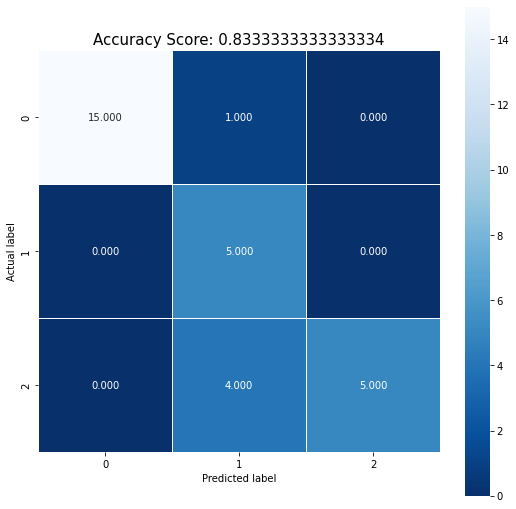

In [6]:
# visualization using Seaborn

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

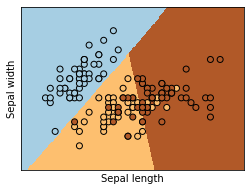

In [7]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()